In [1]:
from SOView import *
import shutil
import os
import gc
from scipy import sparse
import pandas as pd

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.2 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
squidpy==1.1.2


In [2]:
path = '/home/yzy/PUBDT/st/spacetx/raw/ExSeq'

# first data

In [3]:
raw_pd = pd.read_csv(f'{path}/mouse.csv')

In [4]:
raw_pd

,Unnamed: 0,Alcam,Ank1,Ankrd55,B3galt1,Cdh9,Chodl,Cux2,Dlx1,Elfn1,...,Sez6,Slc32a1,Sv2c,Syndig1,Thsd7a,Tnni3k,Unc13c,x_um,y_um,z_um
0,0,2,2,0,2,0,0,3,1,0,...,0,27,0,0,0,0,0,497.757953,517.556884,33.056014
1,1,1,2,0,2,0,0,2,0,1,...,5,12,0,0,1,0,1,5704.203589,147.758201,24.351411
2,2,3,19,1,1,0,0,1,0,0,...,0,38,0,0,0,0,0,4219.596675,968.258278,35.664231
3,3,1,3,0,1,1,0,7,2,7,...,8,18,0,1,1,0,4,7336.899204,307.126286,31.163541
4,4,7,0,0,0,0,0,0,0,1,...,16,0,0,0,0,0,0,6749.182296,533.863954,30.608790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,1149,11,3,1,1,2,2,1,4,1,...,6,27,0,6,7,0,0,10786.543689,19279.692085,55.187142
1150,1150,9,0,0,2,0,1,2,1,3,...,0,0,0,1,1,0,1,11182.389696,18996.789614,65.411555
1151,1151,0,0,0,0,0,0,0,0,1,...,1,13,1,0,1,0,0,6907.812833,19407.180807,32.945293
1152,1152,1,1,0,1,1,0,3,0,1,...,2,0,0,1,1,0,0,6918.667166,21069.031770,70.162877


In [5]:
raw_pd = raw_pd.set_index('Unnamed: 0')

In [6]:
var_names = raw_pd.columns[:-3]

In [10]:
obs_names = np.array(raw_pd.index).astype('str')

In [14]:
X = raw_pd.iloc[:,:-3].values

In [16]:
raw_pd[['x_um','y_um']].values

array([[  497.757953,   517.556884],
       [ 5704.203589,   147.758201],
       [ 4219.596675,   968.258278],
       ...,
       [ 6907.812833, 19407.180807],
       [ 6918.667166, 21069.03177 ],
       [10712.174758, 20394.149165]])

In [23]:
adata = ad.AnnData(X=X)
adata.var_names = var_names
adata.obs_names = obs_names
adata.obsm['spatial'] = raw_pd[['x_um','y_um']].values
adata.obs['x_um'] = raw_pd[['x_um']].values
adata.obs['y_um'] = raw_pd[['y_um']].values
adata.obs['z_um'] = raw_pd[['z_um']].values

/tmp/ipykernel_1151031/3315572044.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X)


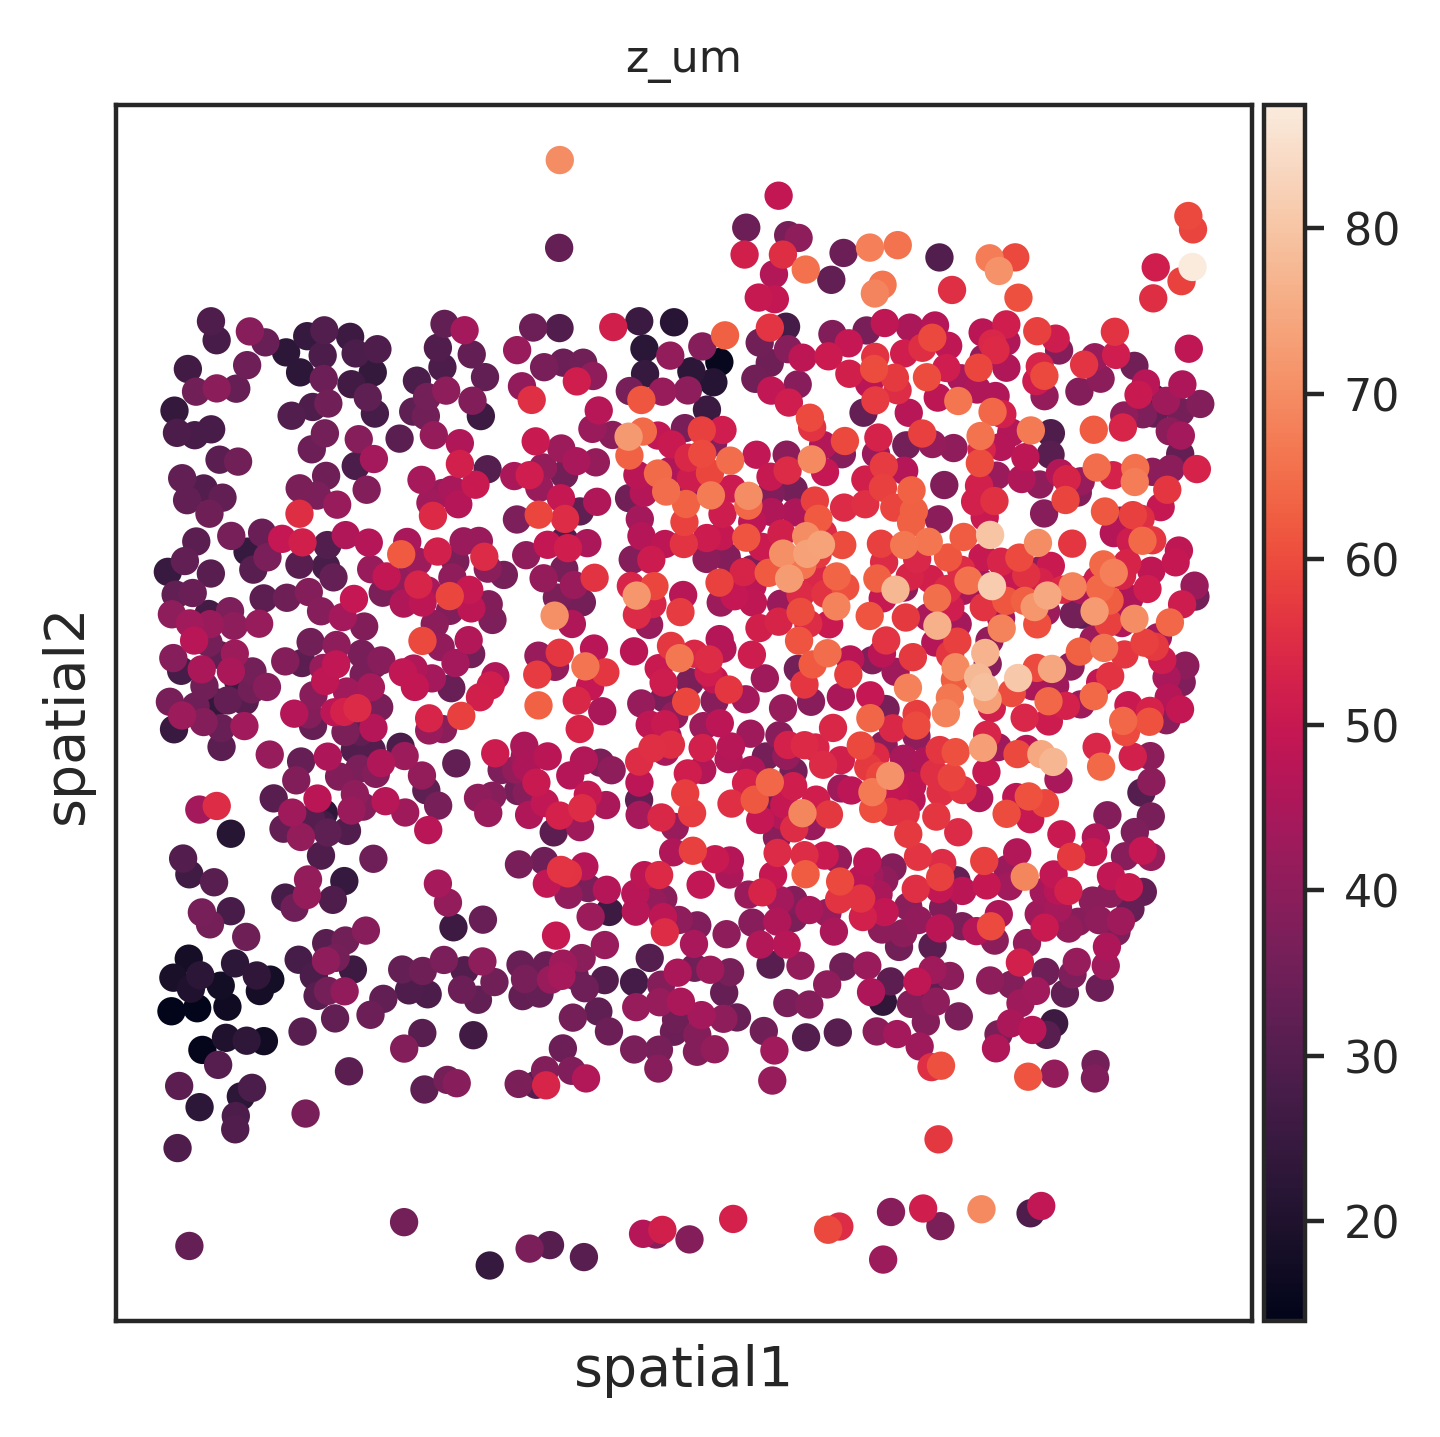

In [24]:
sc.pl.embedding(adata,basis='spatial',color=['z_um'])

In [26]:
adata.write_h5ad(f'{path}/mouse.h5ad')